<a href="https://colab.research.google.com/github/NataliaLily/Project_Titanic/blob/main/Analisis_Survival_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [68]:
from google.colab import files

In [69]:
files.upload()

Saving The Titanic dataset.csv to The Titanic dataset (1).csv


{'The Titanic dataset (1).csv': b'1,2,3,4,5,6,7,8,9,10\nsn,pclass,survived,,gender,age,family,fare,embarked,date\n1,3,0,Mr. Anthony,male,42,0,7.55,,01-Jan-90\n1,3,0,Mr. Anthony,male,42,0,7.55,,01-Jan-90\n2,3,0,Master. Eugene Joseph,male,?,2,20.25,S,02-Jan-90\n3,2,0,"Abbott, Mr. Rossmore Edward",,,2,**,S,03-Jan-90\n4,3,1,"Abbott, Mr. Rossmore Edward",female,35,2,20.25,S,04-Jan-90\n5,3,1,"Abelseth, Miss. Karen Marie",female,16,0,7.65,S,05-Jan-90\n6,3,1,"Abelseth, Mr. Olaus Jorgensen",male,25,0,7.65,S,06-Jan-90\n7,2,0,"Abelson, Mr. Samuel",male,30,1,24,C,07-Jan-90\n8,2,1,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28,1,24,C,08-Jan-90\n9,3,1,"Abrahamsson, Mr. Abraham August Johannes",male,20,0,7.925,S,09-Jan-90\n10,3,1,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18,0,7.2292,C,10-Jan-90\n11,3,0,"Adahl, Mr. Mauritz Nils Martin",male,30,0,7.25,S,11-Jan-90\n12,3,0,"Adams, Mr. John",male,26,0,8.05,S,12-Jan-90\n13,3,0,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40,1,9.475,S

In [70]:
af = pd.read_csv("The Titanic dataset.csv")
af

,1,2,3,4,5,6,7,8,9,10
0,sn,pclass,survived,NaN,gender,age,family,fare,embarked,date
1,1,3,0,Mr. Anthony,male,42,0,7.55,NaN,01-Jan-90
2,1,3,0,Mr. Anthony,male,42,0,7.55,NaN,01-Jan-90
3,2,3,0,Master. Eugene Joseph,male,?,2,20.25,S,02-Jan-90
4,3,2,0,"Abbott, Mr. Rossmore Edward",NaN,NaN,2,**,S,03-Jan-90
...,...,...,...,...,...,...,...,...,...,...
1297,1296,2,0,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24,0,13,S,19-Jul-93
1298,1297,3,0,"Zabour, Miss. Hileni",female,14.5,1,14.4542,C,20-Jul-93
1299,1298,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,7.225,C,21-Jul-93
1300,1299,3,0,"Zakarian, Mr. Ortin",male,27,0,7.225,C,22-Jul-93


In [71]:
af.columns = af.iloc[0]
af = af[1:].reset_index(drop=True)
af.rename(columns={np.nan: 'Name'}, inplace=True)
af

,sn,pclass,survived,Name,gender,age,family,fare,embarked,date
0,1,3,0,Mr. Anthony,male,42,0,7.55,NaN,01-Jan-90
1,1,3,0,Mr. Anthony,male,42,0,7.55,NaN,01-Jan-90
2,2,3,0,Master. Eugene Joseph,male,?,2,20.25,S,02-Jan-90
3,3,2,0,"Abbott, Mr. Rossmore Edward",NaN,NaN,2,**,S,03-Jan-90
4,4,3,1,"Abbott, Mr. Rossmore Edward",female,35,2,20.25,S,04-Jan-90
...,...,...,...,...,...,...,...,...,...,...
1296,1296,2,0,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24,0,13,S,19-Jul-93
1297,1297,3,0,"Zabour, Miss. Hileni",female,14.5,1,14.4542,C,20-Jul-93
1298,1298,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,7.225,C,21-Jul-93
1299,1299,3,0,"Zakarian, Mr. Ortin",male,27,0,7.225,C,22-Jul-93


In [72]:
print(af.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sn        1301 non-null   object
 1   pclass    1301 non-null   object
 2   survived  1301 non-null   object
 3   Name      1301 non-null   object
 4   gender    1300 non-null   object
 5   age       1044 non-null   object
 6   family    1299 non-null   object
 7   fare      1299 non-null   object
 8   embarked  1295 non-null   object
 9   date      1301 non-null   object
dtypes: object(10)
memory usage: 101.8+ KB
None


In [74]:
af['age'] = af['age'].replace(['?',''], np.nan)

af['age'] = pd.to_numeric(af['age'], errors='coerce')

median_age = af['age'].median()

af['age'] = af['age'].fillna(median_age)

af['fare'] = af['fare'].replace(['**',''], np.nan)

af['fare'] = pd.to_numeric(af['fare'], errors='coerce')

median_fare = af['fare'].median()

af['fare'] = af['fare'].fillna(median_fare)

af['date'] = pd.to_datetime(af['date'])

af.info()
af

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   sn        1301 non-null   object        
 1   pclass    1301 non-null   object        
 2   survived  1301 non-null   object        
 3   Name      1301 non-null   object        
 4   gender    1300 non-null   object        
 5   age       1301 non-null   float64       
 6   family    1299 non-null   object        
 7   fare      1301 non-null   float64       
 8   embarked  1295 non-null   object        
 9   date      1301 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 101.8+ KB


,sn,pclass,survived,Name,gender,age,family,fare,embarked,date
0,1,3,0,Mr. Anthony,male,42.0,0,7.5500,NaN,1990-01-01
1,1,3,0,Mr. Anthony,male,42.0,0,7.5500,NaN,1990-01-01
2,2,3,0,Master. Eugene Joseph,male,28.0,2,20.2500,S,1990-01-02
3,3,2,0,"Abbott, Mr. Rossmore Edward",NaN,28.0,2,14.4542,S,1990-01-03
4,4,3,1,"Abbott, Mr. Rossmore Edward",female,35.0,2,20.2500,S,1990-01-04
...,...,...,...,...,...,...,...,...,...,...
1296,1296,2,0,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,13.0000,S,1993-07-19
1297,1297,3,0,"Zabour, Miss. Hileni",female,14.5,1,14.4542,C,1993-07-20
1298,1298,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,7.2250,C,1993-07-21
1299,1299,3,0,"Zakarian, Mr. Ortin",male,27.0,0,7.2250,C,1993-07-22


In [75]:
mode_embarked = af['embarked'].mode()[0]

af['embarked'] = af['embarked'].fillna(mode_embarked)

print(af['embarked'].notna().sum())

af

1301


,sn,pclass,survived,Name,gender,age,family,fare,embarked,date
0,1,3,0,Mr. Anthony,male,42.0,0,7.5500,S,1990-01-01
1,1,3,0,Mr. Anthony,male,42.0,0,7.5500,S,1990-01-01
2,2,3,0,Master. Eugene Joseph,male,28.0,2,20.2500,S,1990-01-02
3,3,2,0,"Abbott, Mr. Rossmore Edward",NaN,28.0,2,14.4542,S,1990-01-03
4,4,3,1,"Abbott, Mr. Rossmore Edward",female,35.0,2,20.2500,S,1990-01-04
...,...,...,...,...,...,...,...,...,...,...
1296,1296,2,0,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,13.0000,S,1993-07-19
1297,1297,3,0,"Zabour, Miss. Hileni",female,14.5,1,14.4542,C,1993-07-20
1298,1298,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,7.2250,C,1993-07-21
1299,1299,3,0,"Zakarian, Mr. Ortin",male,27.0,0,7.2250,C,1993-07-22


In [76]:

af['Name'] = af['Name'].str.replace('[()"\'\']', '', regex=True)

display(af.head())

,sn,pclass,survived,Name,gender,age,family,fare,embarked,date
0,1,3,0,Mr. Anthony,male,42.0,0,7.5500,S,1990-01-01
1,1,3,0,Mr. Anthony,male,42.0,0,7.5500,S,1990-01-01
2,2,3,0,Master. Eugene Joseph,male,28.0,2,20.2500,S,1990-01-02
3,3,2,0,"Abbott, Mr. Rossmore Edward",NaN,28.0,2,14.4542,S,1990-01-03
4,4,3,1,"Abbott, Mr. Rossmore Edward",female,35.0,2,20.2500,S,1990-01-04


In [77]:
mode_gender = af['gender'].mode()[0]

af['gender'] = af['gender'].fillna(mode_gender)

print(af['gender'].notna().sum())

display(af)

1301


,sn,pclass,survived,Name,gender,age,family,fare,embarked,date
0,1,3,0,Mr. Anthony,male,42.0,0,7.5500,S,1990-01-01
1,1,3,0,Mr. Anthony,male,42.0,0,7.5500,S,1990-01-01
2,2,3,0,Master. Eugene Joseph,male,28.0,2,20.2500,S,1990-01-02
3,3,2,0,"Abbott, Mr. Rossmore Edward",male,28.0,2,14.4542,S,1990-01-03
4,4,3,1,"Abbott, Mr. Rossmore Edward",female,35.0,2,20.2500,S,1990-01-04
...,...,...,...,...,...,...,...,...,...,...
1296,1296,2,0,"Yrois, Miss. Henriette Mrs Harbeck",female,24.0,0,13.0000,S,1993-07-19
1297,1297,3,0,"Zabour, Miss. Hileni",female,14.5,1,14.4542,C,1993-07-20
1298,1298,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,7.2250,C,1993-07-21
1299,1299,3,0,"Zakarian, Mr. Ortin",male,27.0,0,7.2250,C,1993-07-22


In [78]:
af['family'] = pd.to_numeric(af['family'], errors='coerce')

mode_family = af['family'].mode()[0]

af['family'] = af['family'].fillna(mode_family)

print(f"Jumlah nilai non-null di kolom 'family': {af['family'].notna().sum()}")

af.info()

Jumlah nilai non-null di kolom 'family': 1301
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   sn        1301 non-null   object        
 1   pclass    1301 non-null   object        
 2   survived  1301 non-null   object        
 3   Name      1301 non-null   object        
 4   gender    1301 non-null   object        
 5   age       1301 non-null   float64       
 6   family    1301 non-null   float64       
 7   fare      1301 non-null   float64       
 8   embarked  1301 non-null   object        
 9   date      1301 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 101.8+ KB


In [79]:
af['survived'] = pd.to_numeric(af['survived'])
survival_rate = af['survived'].mean()
print(f"Tingkat kelangsungan hidup keseluruhan: {survival_rate:.2f}")

Tingkat kelangsungan hidup keseluruhan: 0.38


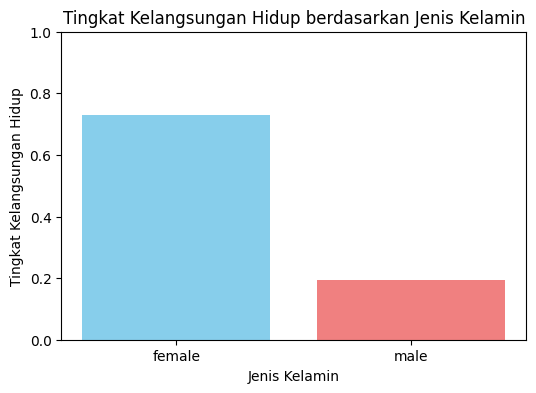

In [80]:

survival_by_gender = af.groupby('gender')['survived'].mean().reset_index()

plt.figure(figsize=(6, 4))
plt.bar(survival_by_gender['gender'], survival_by_gender['survived'], color=['skyblue', 'lightcoral'])
plt.xlabel('Jenis Kelamin')
plt.ylabel('Tingkat Kelangsungan Hidup')
plt.title('Tingkat Kelangsungan Hidup berdasarkan Jenis Kelamin')
plt.ylim(0, 1)
plt.show()

Tingkat kelangsungan hidup berdasarkan kelompok usia:


/tmp/ipython-input-1761681986.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age = af.groupby('age_group')['survived'].mean().reset_index()


,age_group,survived
0,0-10,0.583333
1,11-18,0.428571
2,19-30,0.336795
3,31-50,0.411079
4,51-100,0.400000


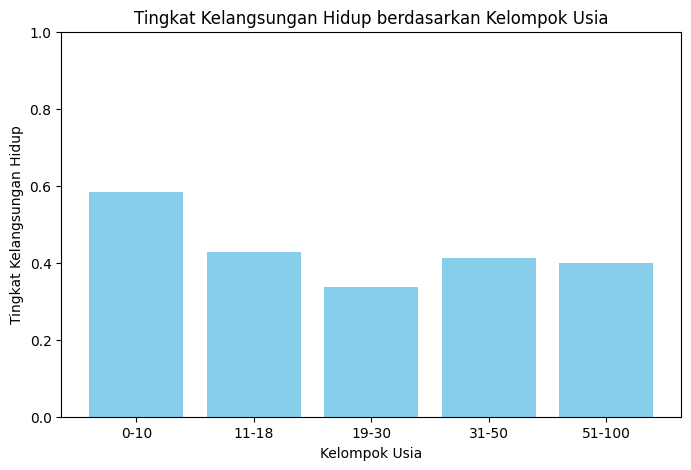

In [81]:
age_bins = [0, 10, 18, 30, 50, 100]
age_labels = ['0-10', '11-18', '19-30', '31-50', '51-100']
af['age_group'] = pd.cut(af['age'], bins=age_bins, labels=age_labels, right=True)

survival_by_age = af.groupby('age_group')['survived'].mean().reset_index()

print("Tingkat kelangsungan hidup berdasarkan kelompok usia:")
display(survival_by_age)

plt.figure(figsize=(8, 5))
plt.bar(survival_by_age['age_group'], survival_by_age['survived'], color='skyblue')
plt.xlabel('Kelompok Usia')
plt.ylabel('Tingkat Kelangsungan Hidup')
plt.title('Tingkat Kelangsungan Hidup berdasarkan Kelompok Usia')
plt.ylim(0, 1)
plt.show()

Tingkat kelangsungan hidup berdasarkan kelas penumpang:


,pclass,survived
0,1,0.619195
1,2,0.428058
2,3,0.258571


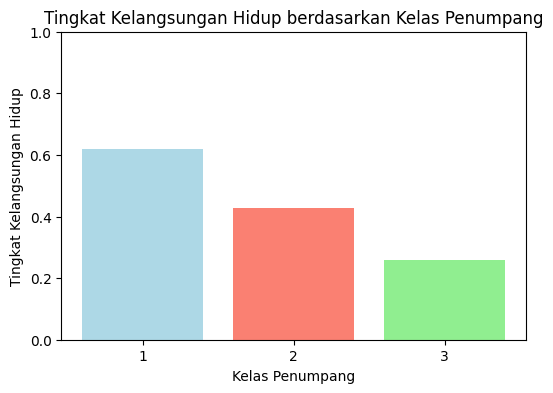

In [82]:
survival_by_pclass = af.groupby('pclass')['survived'].mean().reset_index()

print("Tingkat kelangsungan hidup berdasarkan kelas penumpang:")
display(survival_by_pclass)

plt.figure(figsize=(6, 4))
plt.bar(survival_by_pclass['pclass'], survival_by_pclass['survived'], color=['lightblue', 'salmon', 'lightgreen'])
plt.xlabel('Kelas Penumpang')
plt.ylabel('Tingkat Kelangsungan Hidup')
plt.title('Tingkat Kelangsungan Hidup berdasarkan Kelas Penumpang')
plt.ylim(0, 1)
plt.show()

Tingkat kelangsungan hidup berdasarkan titik keberangkatan:


,embarked,survived
0,C,0.561798
1,Q,0.357724
2,S,0.335895


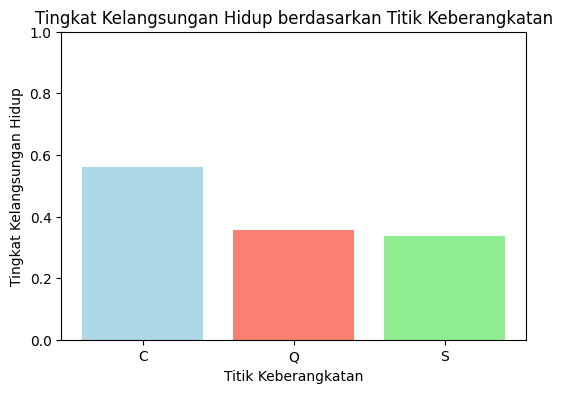

In [83]:
survival_by_embarked = af.groupby('embarked')['survived'].mean().reset_index()

print("Tingkat kelangsungan hidup berdasarkan titik keberangkatan:")
display(survival_by_embarked)

plt.figure(figsize=(6, 4))
plt.bar(survival_by_embarked['embarked'], survival_by_embarked['survived'], color=['lightblue', 'salmon', 'lightgreen'])
plt.xlabel('Titik Keberangkatan')
plt.ylabel('Tingkat Kelangsungan Hidup')
plt.title('Tingkat Kelangsungan Hidup berdasarkan Titik Keberangkatan')
plt.ylim(0, 1)
plt.show()